# 初探数据

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import mpl
# 指定默认字体
mpl.rcParams['font.sans-serif'] = ['FangSong']
# 解决保存图像是负号'-'显示为方块的问题
mpl.rcParams['axes.unicode_minus'] = False
from pandas import Series,DataFrame

data_train = pd.read_csv("train.csv",engine="python",encoding="UTF-8")
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 查看训练数据的信息
* 可以发现:属性Age和Cabin存在缺失值

In [2]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


#### 查看训练数据集中的具体数据数值情况
* 可以发现:大概有0.383838的人获救,2/3等舱的人数比1等舱要多,平均乘客年龄大概是：29.7

In [3]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### 特征分析(统计学与绘图)
* 目的:初步了解数据之间的相关性,为构造特征工程以及模型建立做准备

In [4]:
# 存活人数
data_train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [5]:
# 数值型数据协方差,corr()函数-快速了解个数据的相关性
## 相关性协方差表,corr()函数,返回结果接近0说明无相关性,大于0说明是正相关,小于0是负相关.
data_train_corr = data_train.drop("PassengerId",axis=1).corr()
data_train_corr

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


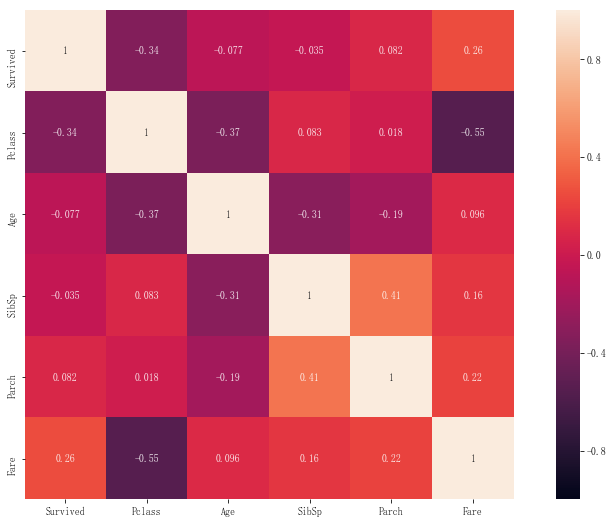

In [6]:
# 画出相关性热力图
a = plt.subplots(figsize=(15,9))#调整画布大小
a = sns.heatmap(data_train_corr, vmin=-1, vmax=1 , annot=True , square=True)#画热力图

#### 各个数据与结果的关系

In [7]:
# ① Pclass,乘客等级,1是最高级
# 结果分析:可以看出Survived和Pclass在Pclass=1的时候有较强的相关性（>0.5），所以最终模型中包含该特征。
data_train.groupby(["Pclass"])["Pclass","Survived"].mean()

,Pclass,Survived
Pclass,,
1,1.0,0.629630
2,2.0,0.472826
3,3.0,0.242363


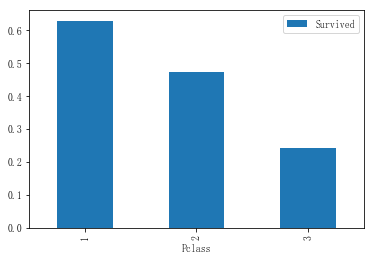

In [8]:
data_train[["Pclass","Survived"]].groupby(["Pclass"]).mean().plot.bar()

In [9]:
# ② Sex,性别
# 结果分析:女性有更高的活下来的概率（74%）,保留该特征
data_train.groupby(["Sex"])["Sex","Survived"].mean()

,Survived
Sex,
female,0.742038
male,0.188908


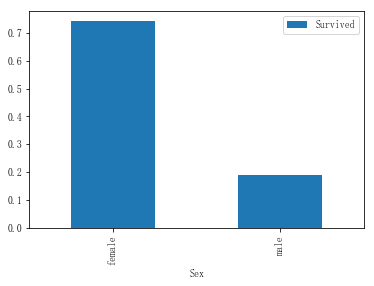

In [10]:
data_train[["Sex","Survived"]].groupby(["Sex"]).mean().plot.bar()

In [11]:
# ③ SibSp and Parch 兄妹配偶数/父母子女数
# 结果分析:这些特征与特定的值没有相关性不明显，最好是由这些独立的特征派生出一个新特征或者一组新特征
data_train[["SibSp","Survived"]].groupby(["SibSp"]).mean()

,Survived
SibSp,
0,0.345395
1,0.535885
2,0.464286
3,0.250000
4,0.166667
5,0.000000
8,0.000000


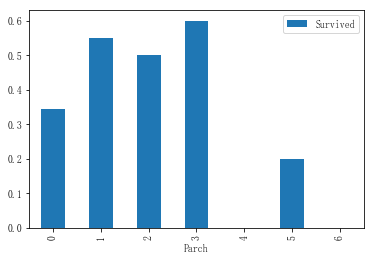

In [12]:
data_train[["Parch","Survived"]].groupby(["Parch"]).mean().plot.bar()

D:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


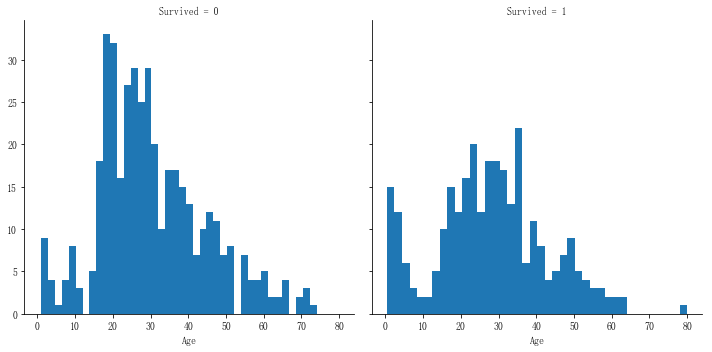

In [13]:
# ④ Age年龄与生存情况的分析.
# 结果分析:由图,可以看到年龄是影响生存情况的.
# 但是年龄是有大部分缺失值的,缺失值需要进行处理,可以使用填充或者模型预测.
g = sns.FacetGrid(data_train, col='Survived',size=5)
g.map(plt.hist, 'Age', bins=40)

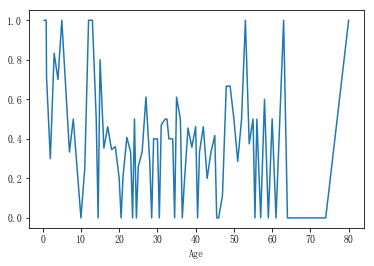

In [14]:
data_train.groupby(['Age'])['Survived'].mean().plot()

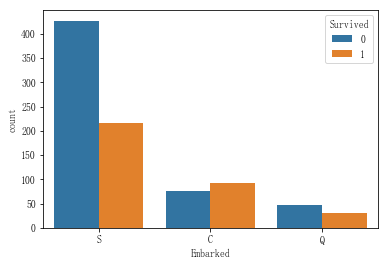

In [15]:
# ⑤ Embarked登港港口与生存情况的分析
# 结果分析:C地的生存率更高,这个也应该保留为模型特征.
sns.countplot('Embarked',hue='Survived',data=data_train)

# 简单数据预处理
### 先对最突出的数据属性进行预处理:Cabin和Age

#### Cabin== 按Cabin有无数据,将这个属性处理成Yes和No两种类型
#### Age==用scikit-learn中的RandomForest来拟合一下缺失的年龄数据
* 1.如果缺值的样本占总数比例极高,我们可能就直接舍弃了,作为 特征加入的话,可能反倒带入noise,影响最后的结果了. 
* 2.如果缺值的样本适中,而该属性非连续值特征属性(比如说类目属性),那就把NaN作为一个新类别,加到类别特征中 
* 3.如果缺值的样本适中,而该属性为连续值特征属性,有时候我们会考虑给定一个step(比如这里的age,我们可以考虑每隔2/3岁为一个步长),然后把它离散化,之后把NaN作为一个type加到属性类目中.   
* 4.有些情况下,缺失的值个数并不是特别多,那我们也可以试着根据已有的值,拟合一下数据,补充上.  本例中,后两种处理方式应该都是可行的,我们先试试拟合补全吧(虽然说没有特别多的背景可供我们拟合，这不一定是一个多么好的选择)

In [16]:
from sklearn.ensemble import RandomForestRegressor

# 使用RandomForestClassifier填补缺失的年龄属性
def set_missing_ags(df):
    # 把已有的数值型特征取出来丢进RandomForestRegressor中
    age_df = df[["Age","Fare","Parch","SibSp","Pclass"]]
    # 将乘客分为已知年龄和未知年龄两部分
    known_age = age_df[age_df.Age.notnull()].values
    unknown_age = age_df[age_df.Age.isnull()].values
    # y即目标年龄
    y = known_age[:,0]
    # x即特征属性值
    X = known_age[:,1:]
    # 用RandomForestRegressor进行训练
    rfr = RandomForestRegressor(random_state=0,n_estimators=200,n_jobs=-1)
    rfr.fit(X,y)
    # 用得到的模型进行对未知年龄结果预测
    predictedAges = rfr.predict(unknown_age[:,1:])
    # 用得到的预测结果填补原缺失数据
    df.loc[(df.Age.isnull()),"Age"] = predictedAges
    return df,rfr

def set_Cabin_type(df):
    df.loc[(df.Cabin.notnull()),"Cabin_type"] = "Yes"
    df.loc[(df.Cabin.isnull()),"Cabin_type"] = "No"
    return df
data_train_copy = data_train.copy()
data_train_copy,rfr = set_missing_ags(data_train_copy)
data_train_copy = set_Cabin_type(data_train_copy)
data_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
Cabin_type     891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [17]:
# 对Embarked的缺失值进行填充
data_train_copy.loc[(data_train_copy.Embarked.isnull()),"Embarked"] = "C"
data_train_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Cabin_type     891 non-null object
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


### 对非数值型特征进行独热编码
* 使用pandas的"get_dummies"来完成这个工作

In [18]:
dummies_Cabin = pd.get_dummies(data_train_copy["Cabin_type"],prefix="Cabin_type")
dummies_Embarked = pd.get_dummies(data_train_copy["Embarked"],prefix="Embarked")
dummies_Sex = pd.get_dummies(data_train_copy["Sex"],prefix="Sex")
dummies_Pclass = pd.get_dummies(data_train_copy["Pclass"],prefix="Pclass")
df = pd.concat([data_train_copy,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 23 columns):
PassengerId       891 non-null int64
Survived          891 non-null int64
Pclass            891 non-null int64
Name              891 non-null object
Sex               891 non-null object
Age               891 non-null float64
SibSp             891 non-null int64
Parch             891 non-null int64
Ticket            891 non-null object
Fare              891 non-null float64
Cabin             204 non-null object
Embarked          891 non-null object
Cabin_type        891 non-null object
Cabin_type_No     891 non-null uint8
Cabin_type_Yes    891 non-null uint8
Embarked_C        891 non-null uint8
Embarked_Q        891 non-null uint8
Embarked_S        891 non-null uint8
Pclass_1          891 non-null uint8
Pclass_2          891 non-null uint8
Pclass_3          891 non-null uint8
Sex_female        891 non-null uint8
Sex_male          891 non-null uint8
dtypes: float64(2), int64(5), obje

### 用scikit-learn里面的preprocessing模块进行标准化到[-1,1]之内
* 仔细看看Age和Fare两个属性,乘客的数值幅度变化,
* 了解逻辑回归与梯度下降的话,各属性值之间scale差距太大,将对收敛速度造成几万点伤害值! 甚至不收敛！

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
age_scale_param = scaler.fit(df["Age"].values.reshape(-1,1))
df["Age_scaled"] = scaler.fit_transform(df["Age"].values.reshape(-1,1),age_scale_param)
fare_scale_param = scaler.fit(df["Fare"].values.reshape(-1,1))
df["Fare_scaled"] = scaler.fit_transform(df["Fare"].values.reshape(-1,1),fare_scale_param)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_type',
       'Cabin_type_No', 'Cabin_type_Yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Age_scaled', 'Fare_scaled'],
      dtype='object')

# 逻辑回归建模
* 把需要的feature字段取出来，转成numpy格式，使用scikit-learn中的LogisticRegression建模

In [20]:
from sklearn import linear_model

# 用正则取出我们要的属性值
train_df = df.filter(regex="Survived|Age_.*|SibSp|Parch|Fare_.*|Cabin_type_.*|Embarked_.*|Sex_.*|Pclass_.*")
train_np = train_df.values
# X即第1列及以后:特征属性
X = train_np[:,1:]
# y即第0列:标签
y = train_np[:,0:1]

In [21]:
# 使用gridsearchcv进行交叉验证选取最优的超参数。
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
parameters = {"penalty":("l1","l2"),
             "C":[0.01,0.1,1,10,20]}
# 使用LogisticRegression进行训练
LR_estimator = linear_model.LogisticRegression(solver='liblinear',C=1.0, penalty='l1', tol=1e-6)
grid_search = GridSearchCV(LR_estimator,param_grid=parameters,scoring="precision",cv=10)
grid_search.fit(X,y)
grid_search.cv_results_,grid_search.best_params_,grid_search.best_score_

({'mean_fit_time': array([0.0016988 , 0.002898  , 0.00489762, 0.004497  , 0.00869465,
         0.00369596, 0.02128632, 0.00429802, 0.04037747, 0.00319753]),
  'std_fit_time': array([0.00063995, 0.00053815, 0.0015771 , 0.00135845, 0.0017913 ,
         0.00109766, 0.00515449, 0.00090047, 0.01403003, 0.00087125]),
  'mean_score_time': array([0.00129948, 0.00139916, 0.00219929, 0.00219898, 0.0016989 ,
         0.00130041, 0.00210035, 0.00209906, 0.00159855, 0.00099986]),
  'std_score_time': array([0.00045804, 0.00048954, 0.00146862, 0.00107692, 0.00089842,
         0.00045769, 0.00151272, 0.00082906, 0.00091587, 0.00044686]),
  'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 20, 20],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1',
                     'l2'],
      

# 用随机森林进行建模

In [22]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from tqdm import *
parameters = {  
    "n_estimators": [100,200,],  
    "max_depth":[5,6,7,8],
    "min_samples_leaf": [1,2],  
    "min_samples_split": [5,6,7,8],
    "max_features":["sqrt"]
}
RF_estimator = RandomForestClassifier(random_state=0, n_estimators=2000, n_jobs=-1)
grid_search = GridSearchCV(RF_estimator, param_grid=parameters, scoring='roc_auc', cv=10)
grid_search.fit(X=X,y=y)
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([0.63462224, 0.27043052, 0.15598962, 0.27602742, 0.16710556,
         0.29035401, 0.17680719, 0.37488053, 0.1894902 , 0.28372765,
         0.15104551, 0.30498328, 0.15697181, 0.32610965, 0.17063663,
         0.28233519, 0.17146964, 0.31261759, 0.16706774, 0.33930669,
         0.19524989, 0.33261027, 0.18558443, 0.32071655, 0.17615662,
         0.3347445 , 0.18828893, 0.27867572, 0.15238183, 0.28640156,
         0.17079785, 0.32061114, 0.17849371, 0.33900554, 0.18103323,
         0.32630966, 0.17414813, 0.28618586, 0.14909053, 0.29584949,
         0.19221463, 0.31451597, 0.17599552, 0.29206619, 0.15280128,
         0.27292747, 0.15654027, 0.26943941, 0.16402085, 0.28599873,
         0.17934163, 0.32442813, 0.18458703, 0.30624256, 0.16431966,
         0.27763283, 0.1508884 , 0.30950706, 0.16240897, 0.41186254,
         0.25325582, 0.40366936, 0.17406726, 0.2982084 ]),
  'std_fit_time': array([1.40336986, 0.01013477, 0.00924156, 0.01641058, 0.0238631 ,
         0.

# 绘制学习曲线

In [23]:
# 绘制学习曲线
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=10, n_jobs=1,
                        train_sizes=np.linspace(.05, 1., 20), verbose=0, plot=True):
    """
    画出data在某模型上的learning curve.
    参数解释
    ----------
    estimator : 你用的分类器。
    title : 表格的标题。
    X : 输入的feature，numpy类型
    y : 输入的target vector
    ylim : tuple格式的(ymin, ymax), 设定图像中纵坐标的最低点和最高点
    cv : 做cross-validation的时候，数据分成的份数，其中一份作为cv集，其余n-1份作为training(默认为3份)
    n_jobs : 并行的的任务数(默认1)
    """

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, verbose=verbose)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    if plot:
        plt.figure()
        plt.title(title)
        if ylim is not None:
            plt.ylim(*ylim)
        plt.xlabel(u"训练样本数")
        plt.ylabel(u"得分")
        plt.gca().invert_yaxis()
        plt.grid()

        plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std,
                         alpha=0.1, color="b")
        plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std,
                         alpha=0.1, color="r")
        plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label=u"训练集上得分")
        plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label=u"交叉验证集上得分")

        plt.legend(loc="best")

        plt.draw()
        plt.gca().invert_yaxis()
        plt.show()

    midpoint = ((train_scores_mean[-1] + train_scores_std[-1]) + (test_scores_mean[-1] - test_scores_std[-1])) / 2
    diff = (train_scores_mean[-1] + train_scores_std[-1]) - (test_scores_mean[-1] - test_scores_std[-1])
    return midpoint, diff

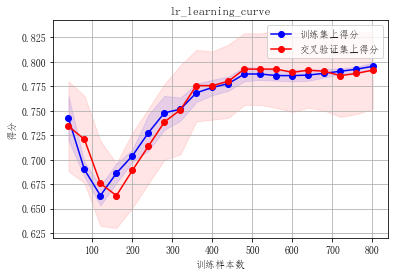

(0.7755107858691088, 0.047184696184816466)

In [24]:
# 绘制逻辑回归的学习曲线
clf_LR = linear_model.LogisticRegression(C=0.01,penalty="l2",tol=1e-6)
clf_LR.fit(X,y)
plot_learning_curve(estimator=clf_LR,title="lr_learning_curve",X=X,y=y)

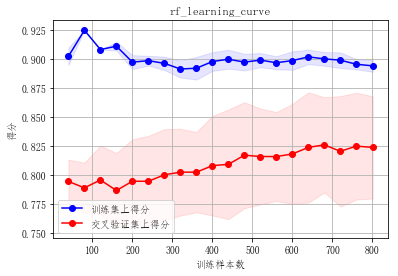

(0.8395920135422879, 0.11956753346473759)

In [25]:
# 绘制随机森林的学习曲线
clf_rf = RandomForestClassifier(random_state=0, n_estimators=100,max_depth=8, min_samples_leaf=1,min_samples_split=6,max_features='sqrt',n_jobs=-1)
clf_rf.fit(X=X,y=y)
plot_learning_curve(estimator=clf_rf,title="rf_learning_curve",X=X,y=y)

In [26]:
# 对测试集进行与训练集相同的处理
data_test = pd.read_csv("test.csv")
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [27]:
# 对Fare属性进行填充
data_test_copy = data_test.copy()
fare_mean = data_test_copy.Fare.mean()
data_test_copy.loc[(data_test_copy.Fare.isnull()),"Fare"] = fare_mean
data_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [28]:
# 首先用同样的RandomForestRegressor模型填上丢失的年龄
tmp_df = data_test_copy[["Age","Fare","Parch","SibSp","Pclass"]]
null_age = tmp_df[data_test_copy.Age.isnull()].values
# 根据特征属性X预测年龄并补上
X = null_age[:,1:]
predictedAges = rfr.predict(X)
data_test_copy.loc[(data_test_copy.Age.isnull()),"Age"] = predictedAges
data_test_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [29]:
# 处理属性Cabin
data_test_copy = set_Cabin_type(data_test_copy)
data_test_copy["Cabin_type"].value_counts()

No     327
Yes     91
Name: Cabin_type, dtype: int64

In [30]:
# 进行对非数值型属性进行独热编码
dummies_Cabin = pd.get_dummies(data_test_copy["Cabin_type"],prefix="Cabin_type")
dummies_Embarked = pd.get_dummies(data_test_copy["Embarked"],prefix="Embarked")
dummies_Sex = pd.get_dummies(data_test_copy["Sex"],prefix="Sex")
dummies_Pclass = pd.get_dummies(data_test_copy["Pclass"],prefix="Pclass")

df_test = pd.concat([data_test_copy,dummies_Cabin,dummies_Embarked,dummies_Pclass,dummies_Sex],axis=1)
# 对属性Age和Fare进行标准化
df_test["Age_scaled"] = scaler.fit_transform(df_test["Age"].values.reshape(-1,1),age_scale_param)
df_test["Fare_scaled"] = scaler.fit_transform(df_test["Fare"].values.reshape(-1,1),fare_scale_param)
df_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_type', 'Cabin_type_No',
       'Cabin_type_Yes', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age_scaled',
       'Fare_scaled'],
      dtype='object')

In [31]:
# 逻辑回归预测结果
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_type_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf_LR.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("LR_predictions_01.csv", index=False)

In [32]:
# 随机森林预测结果
test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_type_.*|Embarked_.*|Sex_.*|Pclass_.*')
predictions = clf_rf.predict(test)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("Random_Forest_predictions_01.csv", index=False)

In [33]:
# SVM预测结果
# test = df_test.filter(regex='Age_.*|SibSp|Parch|Fare_.*|Cabin_type_.*|Embarked_.*|Sex_.*|Pclass_.*')
# predictions = clf_svc.predict(test)
# result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
# result.to_csv("SVM_predictions_01.csv", index=False)

# 模型优化

## 模型系数关联分析
下面的系数和最后的结果是一个正相关的关系<br>
我们先看看那些权重绝对值非常大的feature，在我们的模型上：<br>

* Sex属性，如果是female会极大提高最后获救的概率，而male会很大程度拉低这个概率。
* Pclass属性，1等舱乘客最后获救的概率会上升，而乘客等级为3会极大地拉低这个概率。
* 有Cabin值会很大程度拉升最后获救概率(这里似乎能看到了一点端倪，事实上从最上面的有无Cabin记录的Survived分布图上看出，即使有Cabin记录的乘客也有一部分遇难了，估计这个属性上我们挖掘还不够)
* Age是一个负相关，意味着在我们的模型里，年龄越小，越有获救的优先权(还得回原数据看看这个是否合理）
* 有一个登船港口S会很大程度拉低获救的概率，另外俩港口压根就没啥作用(这个实际上非常奇怪，因为我们从之前的统计图上并没有看到S港口的获救率非常低，所以也许可以考虑把登船港口这个feature去掉试试)。
* 船票Fare有小幅度的正相关(并不意味着这个feature作用不大，有可能是我们细化的程度还不够，举个例子，说不定我们得对它离散化，再分至各个乘客等级上？)

In [34]:
# 查看逻辑回归模型的系数
pd.DataFrame({"columns":list(train_df.columns)[1:],"coef":list(clf_LR.coef_.T)})

,columns,coef
0,SibSp,[-0.13263117421190526]
1,Parch,[0.018307423347041243]
2,Cabin_type_No,[-0.21081966691586573]
3,Cabin_type_Yes,[0.20276259309951403]
4,Embarked_C,[0.09455169361611905]
5,Embarked_Q,[0.019811371734399424]
6,Embarked_S,[-0.12242013916687092]
7,Pclass_1,[0.171159326275892]
8,Pclass_2,[0.10812692812899324]
9,Pclass_3,[-0.2873433282212365]


我们列一些可能可以做的优化操作：<br>

* Age属性不使用现在的拟合方式，而是根据名称中的『Mr』『Mrs』『Miss』等的平均值进行填充。
* Age不做成一个连续值属性，而是使用一个步长进行离散化，变成离散的类目feature。
* Cabin再细化一些，对于有记录的Cabin属性，我们将其分为前面的字母部分(我猜是位置和船层之类的信息) 和 后面的数字部分(应该是房间号，有意思的事情是，如果你仔细看看原始数据，你会发现，这个值大的情况下，似乎获救的可能性高一些)。
* Pclass和Sex俩太重要了，我们试着用它们去组出一个组合属性来试试，这也是另外一种程度的细化。
* 单加一个Child字段，Age<=12的，设为1，其余为0(你去看看数据，确实小盆友优先程度很高啊)
* 如果名字里面有『Mrs』，而Parch>1的，我们猜测她可能是一个母亲，应该获救的概率也会提高，因此可以多加一个Mother字段，此种情况下设为1，其余情况下设为0
* 登船港口可以考虑先去掉试试(Q和C本来就没权重，S有点诡异)
* 把堂兄弟/兄妹 和 Parch 还有自己 个数加在一起组一个Family_size字段(考虑到大家族可能对最后的结果有影响)
* Name是一个我们一直没有触碰的属性，我们可以做一些简单的处理，比如说男性中带某些字眼的(‘Capt’, ‘Don’, ‘Major’, ‘Sir’)可以统一到一个Title，女性也一样。

大家接着往下挖掘，可能还可以想到更多可以细挖的部分。我这里先列这些了，然后我们可以使用手头上的”train_df”和”cv_df”开始试验这些feature engineering的tricks是否有效了。

In [35]:
# 构建一个新的属性family_size
df["family_size"] = df["SibSp"] + df["Parch"] + 1
df.family_size.value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family_size, dtype: int64

In [36]:
df.loc[df.family_size == 1,"family_type"] = "single"
df.loc[df.family_size.isin([2,3]),"family_type"] = "middle"
df.loc[df.family_size >= 4,"family_type"] = "big"
df.family_type.value_counts()

single    537
middle    263
big        91
Name: family_type, dtype: int64

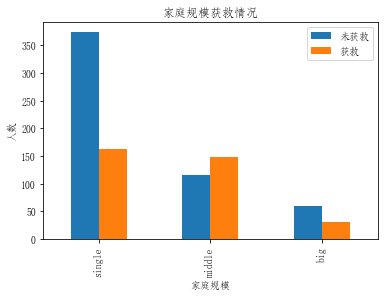

In [37]:
Survived_0 = df.family_type[df.Survived == 0].value_counts()
Survived_1 = df.family_type[df.Survived == 1].value_counts()
family_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1}) 
family_df.plot(kind="bar")
plt.title(u"家庭规模获救情况")
plt.xlabel(u"家庭规模")
plt.ylabel(u"人数")
plt.show()

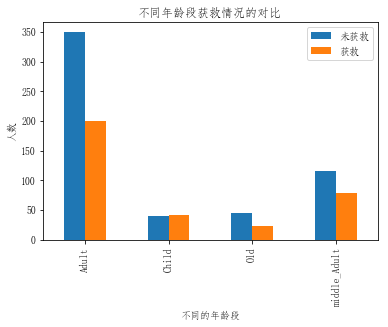

In [38]:
# 对age进行离散化
df.loc[df.Age <= 12,"Age_type"] = "Child"
df.loc[(df.Age > 12) & (df.Age <=35),"Age_type"] = "Adult"
df.loc[(df.Age > 35) & (df.Age <=50),"Age_type"] = "middle_Adult"
df.loc[df.Age > 50,"Age_type"] = "Old"
Survived_0 = df.Age_type[df.Survived == 0].value_counts()
Survived_1 = df.Age_type[df.Survived == 1].value_counts()
age_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
age_df.plot(kind="bar")
plt.title(u"不同年龄段获救情况的对比")
plt.xlabel(u"不同的年龄段")
plt.ylabel(u"人数")
plt.show()

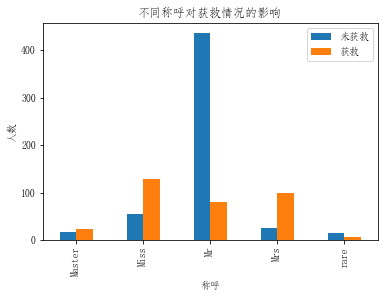

In [39]:
# 进行Name属性的处理
import re
regex = re.compile("(.*, )|(\\..*)")
title = []
for name in df.Name.values:
    title.append(re.sub(regex,'',name))
df["title"] = title
df.loc[df.title == "Mlle","title"] = "Miss"
df.loc[df.title == "Ms","title"] = "Miss"
df.loc[df.title == "Mme","title"] = "Mrs"
common = ["Mr","Miss","Mrs","Master"]
df.loc[~df.title.isin(common),"title"] = "rare"
Survived_0 = df.title[df.Survived == 0].value_counts()
Survived_1 = df.title[df.Survived == 1].value_counts()
title_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
title_df.plot(kind="bar")
plt.title(u"不同称呼对获救情况的影响")
plt.xlabel(u"称呼")
plt.ylabel(u"人数")
plt.show()

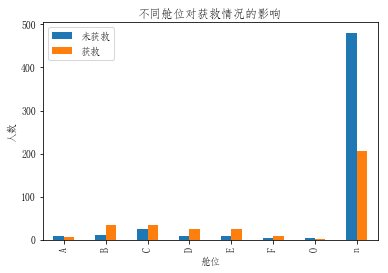

In [40]:
# 对Cabin进行处理
train_cabin_type = []
for tmp_cabin in df.Cabin.values:
    train_cabin_type.append(str(tmp_cabin)[0])
df["Cabin_first"] = train_cabin_type
df.loc[df.Cabin_first == "G","Cabin_first"] = "O"
df.loc[df.Cabin_first == "T","Cabin_first"] = "O"
Survived_0 = df.Cabin_first[df.Survived == 0].value_counts()
Survived_1 = df.Cabin_first[df.Survived == 1].value_counts()
title_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
title_df.plot(kind="bar")
plt.title(u"不同舱位对获救情况的影响")
plt.xlabel(u"舱位")
plt.ylabel(u"人数")
plt.show()

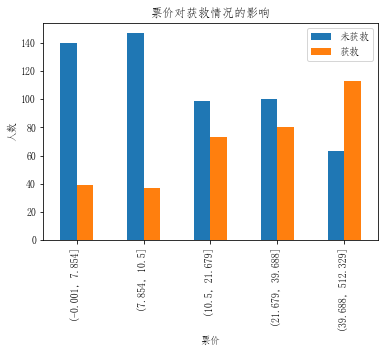

In [41]:
# 对Fare进行离散化
df['Fare_bin'] = pd.qcut(df['Fare'], 5)
Survived_0 = df.Fare_bin[df.Survived == 0].value_counts()
Survived_1 = df.Fare_bin[df.Survived == 1].value_counts()
fare_df = pd.DataFrame({u"未获救":Survived_0,u"获救":Survived_1})
fare_df.plot(kind="bar")
plt.title("票价对获救情况的影响")
plt.xlabel("票价")
plt.ylabel("人数")
plt.show()

In [42]:
# 对Fare进行独热编码
dummies_fare_bin = pd.get_dummies(df['Fare_bin']).rename(columns=lambda x: 'Fare_bin_' + str(x))
df = pd.concat([df, dummies_fare_bin], axis=1)
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_type',
       'Cabin_type_No', 'Cabin_type_Yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Age_scaled', 'Fare_scaled', 'family_size', 'family_type',
       'Age_type', 'title', 'Cabin_first', 'Fare_bin',
       'Fare_bin_(-0.001, 7.854]', 'Fare_bin_(7.854, 10.5]',
       'Fare_bin_(10.5, 21.679]', 'Fare_bin_(21.679, 39.688]',
       'Fare_bin_(39.688, 512.329]'],
      dtype='object')

In [43]:
# 对family_type进行独热编码
# 对title进行独热编码
# 对age_type进行独热编码
# 对cabin_first进行独热编码
dummies_title = pd.get_dummies(df["title"],prefix="title")
dummies_family = pd.get_dummies(df["family_type"],prefix="family_type")
dummies_age = pd.get_dummies(df["Age_type"],prefix="Age_type")
dummies_cabin_first = pd.get_dummies(df["Cabin_first"],prefix="Cabin_first")
train_df_opt1 = pd.concat([df,dummies_title,dummies_family,dummies_age,dummies_cabin_first],axis=1)
train_df_opt1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_type',
       'Cabin_type_No', 'Cabin_type_Yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Age_scaled', 'Fare_scaled', 'family_size', 'family_type',
       'Age_type', 'title', 'Cabin_first', 'Fare_bin',
       'Fare_bin_(-0.001, 7.854]', 'Fare_bin_(7.854, 10.5]',
       'Fare_bin_(10.5, 21.679]', 'Fare_bin_(21.679, 39.688]',
       'Fare_bin_(39.688, 512.329]', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_rare', 'family_type_big', 'family_type_middle',
       'family_type_single', 'Age_type_Adult', 'Age_type_Child',
       'Age_type_Old', 'Age_type_middle_Adult', 'Cabin_first_A',
       'Cabin_first_B', 'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E',
       'Cabin_first_F', 'Cabin_first_O', 'Cabin_first_n'],
      dtype='object')

In [44]:
train_df = train_df_opt1.filter(regex="Survived|SibSp|Parch|Pclass_.*|Sex_.*|title_.*|family_type_.*|Age_type_.*|Fare_bin_.*|Cabin_first_.*|Embarked_.*")
train_df.columns

Index(['Survived', 'SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S',
       'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Fare_bin_(-0.001, 7.854]', 'Fare_bin_(7.854, 10.5]',
       'Fare_bin_(10.5, 21.679]', 'Fare_bin_(21.679, 39.688]',
       'Fare_bin_(39.688, 512.329]', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_rare', 'family_type_big', 'family_type_middle',
       'family_type_single', 'Age_type_Adult', 'Age_type_Child',
       'Age_type_Old', 'Age_type_middle_Adult', 'Cabin_first_A',
       'Cabin_first_B', 'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E',
       'Cabin_first_F', 'Cabin_first_O', 'Cabin_first_n'],
      dtype='object')

In [45]:
# 划分训练集和验证集
# split_train,split_cv = train_test_split(train_df,test_size=0.3,random_state=42)
train_np = train_df.values
X = train_np[:,1:]
y = train_np[:,0:1]
estimator_LR = linear_model.LogisticRegression(solver="liblinear",C=1.0,penalty="l1",tol=1e-6)
parameters = {"penalty":("l1","l2"),
             "C":[0.01,0.1,1,10,20]}
grid_search = GridSearchCV(estimator_LR,param_grid=parameters,scoring="precision",cv=10)
grid_search.fit(X,y)
grid_search.cv_results_,grid_search.best_params_,grid_search.best_score_

({'mean_fit_time': array([0.00339689, 0.00279803, 0.00369713, 0.00289795, 0.0128921 ,
         0.00599599, 0.06985965, 0.00599558, 0.06736107, 0.00659595]),
  'std_fit_time': array([0.00066256, 0.00074803, 0.00063972, 0.00053823, 0.00452418,
         0.0030967 , 0.02568924, 0.00099919, 0.03476221, 0.00101887]),
  'mean_score_time': array([0.0010004 , 0.00109978, 0.00089967, 0.00119987, 0.0009001 ,
         0.00120006, 0.00109973, 0.00110021, 0.0009999 , 0.0011996 ]),
  'std_score_time': array([9.94522744e-07, 5.38239094e-04, 6.99639467e-04, 3.99877645e-04,
         3.00034565e-04, 3.99959488e-04, 5.38646588e-04, 2.99486178e-04,
         7.57330903e-07, 3.99649512e-04]),
  'param_C': masked_array(data=[0.01, 0.01, 0.1, 0.1, 1, 1, 10, 10, 20, 20],
               mask=[False, False, False, False, False, False, False, False,
                     False, False],
         fill_value='?',
              dtype=object),
  'param_penalty': masked_array(data=['l1', 'l2', 'l1', 'l2', 'l1', 'l2', 'l1

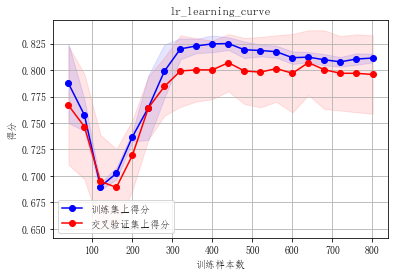

(0.7871507517682367, 0.05665979484055539)

In [46]:
clf_LR_opt = linear_model.LogisticRegression(C=0.01,penalty="l2",tol=1e-6)
clf_LR_opt.fit(X,y)
plot_learning_curve(estimator=clf_LR_opt,title="lr_learning_curve",X=X,y=y)

In [47]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from tqdm import *
parameters = {  
    "n_estimators": [100,200,],  
    "max_depth":[5,6,7,8],
    "min_samples_leaf": [1,2],  
    "min_samples_split": [5,6,7,8],
    "max_features":["sqrt"]
}
estimator_RF = RandomForestClassifier(random_state=0, n_estimators=2000, n_jobs=-1)
grid_search = GridSearchCV(estimator_RF, param_grid=parameters, scoring='roc_auc', cv=10)
grid_search.fit(X=X,y=y)
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([0.18067825, 0.32141292, 0.16263051, 0.33045533, 0.15640643,
         0.32141125, 0.14730213, 0.31112006, 0.16508839, 0.30491741,
         0.1676048 , 0.29077036, 0.15692995, 0.30104017, 0.17953446,
         0.2934263 , 0.17232895, 0.31783304, 0.17106431, 0.29136887,
         0.17139935, 0.29966431, 0.19126794, 0.32081268, 0.17848995,
         0.28819237, 0.19628232, 0.36128471, 0.18314276, 0.27443686,
         0.14082625, 0.28278341, 0.20027585, 0.34300411, 0.16754835,
         0.3028276 , 0.15283878, 0.33692973, 0.17733705, 0.29306166,
         0.16629908, 0.25160053, 0.15741842, 0.34939661, 0.16833372,
         0.32410879, 0.17898118, 0.34300196, 0.18545818, 0.30501857,
         0.14294782, 0.33660207, 0.18790214, 0.30196424, 0.15930314,
         0.31521311, 0.15026488, 0.28144698, 0.15758088, 0.28623238,
         0.17689385, 0.27641456, 0.14720109, 0.32830427]),
  'std_fit_time': array([0.02579109, 0.02586942, 0.02881411, 0.05908688, 0.01984789,
         0.

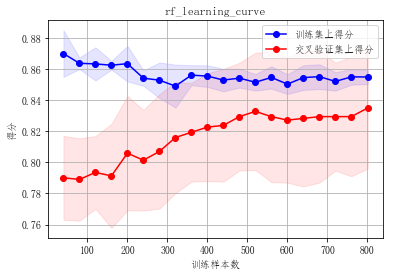

(0.8277643887270119, 0.06346031961588738)

In [48]:
clf_RF_opt = RandomForestClassifier(random_state=0, n_estimators=100,max_depth=7, min_samples_leaf=2,min_samples_split=5,max_features='sqrt',n_jobs=-1)
clf_RF_opt.fit(X=X,y=y)
plot_learning_curve(estimator=clf_RF_opt,title="rf_learning_curve",X=X,y=y)

In [49]:
#对测试集进行与训练集相同的处理
# 对Name属性进行提取称呼,如在测试集处理时
import re
regex = re.compile("(.*, )|(\\..*)")
title = []
for name in df_test.Name.values:
    title.append(re.sub(regex,'',name))
df_test["title"] = title
df_test.title.value_counts()
df_test.loc[df_test.title == "Mlle","title"] = "Miss"
df_test.loc[df_test.title == "Ms","title"] = "Miss"
df_test.loc[df_test.title == "Mme","title"] = "Mrs"
common = ["Mr","Miss","Mrs","Master"]
df_test.loc[~df_test.title.isin(common),"title"] = "rare"

In [50]:
# 对SibSp和Parch进行合并为family_size新的属性
df_test["family_size"] = df_test["SibSp"] + df_test["Parch"] + 1
df_test.loc[df_test.family_size == 1,"family_type"] = "single"
df_test.loc[df_test.family_size.isin([2,3]),"family_type"] = "middle"
df_test.loc[df_test.family_size >= 4,"family_type"] = "big"
df_test.family_type.value_counts()

single    253
middle    131
big        34
Name: family_type, dtype: int64

In [51]:
# 对Cabin提取首字母
test_cabin_type = []
for tmp_cabin in df_test.Cabin.values:
    test_cabin_type.append(str(tmp_cabin)[0])
df_test["Cabin_first"] = test_cabin_type
df_test.loc[df_test.Cabin_first == "G","Cabin_first"] = "O"
df_test.loc[df_test.Cabin_first == "T","Cabin_first"] = "O"
df_test.Cabin_first.value_counts()

n    327
C     35
B     18
D     13
E      9
F      8
A      7
O      1
Name: Cabin_first, dtype: int64

In [52]:
# 对Fare进行离散化
df_test['Fare_bin'] = pd.qcut(df_test['Fare'], 5)
dummies_fare_bin = pd.get_dummies(df_test['Fare_bin']).rename(columns=lambda x: 'Fare_bin_' + str(x))
df_test = pd.concat([df_test, dummies_fare_bin], axis=1)

In [53]:
# 对Age进行离散化
df_test.loc[df_test.Age <= 12,"Age_type"] = "Child"
df_test.loc[(df_test.Age > 12) & (df_test.Age <= 35),"Age_type"] = "Adult"
df_test.loc[(df_test.Age > 35) & (df_test.Age <= 50),"Age_type"] = "middleAdult"
df_test.loc[df_test.Age > 50,"Age_type"] = "Old"

In [54]:
#对title、family_type、Age_type以及Cabin进行独热编码
dummies_title = pd.get_dummies(df_test["title"],prefix="title")
dummies_family_type = pd.get_dummies(df_test["family_type"],prefix="family_type")
dummies_age = pd.get_dummies(df_test["Age_type"],prefix="Age_type")
dummies_cabin_first = pd.get_dummies(df_test["Cabin_first"],prefix="Cabin_first")
test_df_opt1 = pd.concat([df_test,dummies_title,dummies_family_type,dummies_age,dummies_cabin_first],axis=1)
test_df_opt1.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_type', 'Cabin_type_No',
       'Cabin_type_Yes', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male', 'Age_scaled',
       'Fare_scaled', 'title', 'family_size', 'family_type', 'Cabin_first',
       'Fare_bin', 'Fare_bin_(-0.001, 7.796]', 'Fare_bin_(7.796, 11.342]',
       'Fare_bin_(11.342, 21.679]', 'Fare_bin_(21.679, 46.34]',
       'Fare_bin_(46.34, 512.329]', 'Age_type', 'title_Master', 'title_Miss',
       'title_Mr', 'title_Mrs', 'title_rare', 'family_type_big',
       'family_type_middle', 'family_type_single', 'Age_type_Adult',
       'Age_type_Child', 'Age_type_Old', 'Age_type_middleAdult',
       'Cabin_first_A', 'Cabin_first_B', 'Cabin_first_C', 'Cabin_first_D',
       'Cabin_first_E', 'Cabin_first_F', 'Cabin_first_O', 'Cabin_first_n'],
      dtype='object')

In [56]:
test_df = test_df_opt1.filter(regex="SibSp|Parch|Pclass_.*|Sex_.*|title_.*|family_type_.*|Age_type_.*|Fare_bin_.*|Cabin_first_.*|Embarked_.*")
test_df.columns

Index(['SibSp', 'Parch', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Pclass_1',
       'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Fare_bin_(-0.001, 7.796]', 'Fare_bin_(7.796, 11.342]',
       'Fare_bin_(11.342, 21.679]', 'Fare_bin_(21.679, 46.34]',
       'Fare_bin_(46.34, 512.329]', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_rare', 'family_type_big', 'family_type_middle',
       'family_type_single', 'Age_type_Adult', 'Age_type_Child',
       'Age_type_Old', 'Age_type_middleAdult', 'Cabin_first_A',
       'Cabin_first_B', 'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E',
       'Cabin_first_F', 'Cabin_first_O', 'Cabin_first_n'],
      dtype='object')

In [57]:
predictions = clf_LR_opt.predict(test_df)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("LR_predictions_02.csv", index=False)

In [58]:
predictions = clf_RF_opt.predict(test_df)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("RF_predictions_02.csv", index=False)

In [73]:
# 添加一个特征mother
train_df_opt1.loc[(train_df_opt1.title == "Mrs") & (train_df_opt1.Parch > 1),"Mother"] = 1
train_df_opt1.loc[train_df_opt1.Mother.isnull(),"Mother"] = 0

In [74]:
train_df_opt1.Mother.value_counts()

0.0    867
1.0     24
Name: Mother, dtype: int64

In [75]:
train_df_opt1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Cabin_type',
       'Cabin_type_No', 'Cabin_type_Yes', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female',
       'Sex_male', 'Age_scaled', 'Fare_scaled', 'family_size', 'family_type',
       'Age_type', 'title', 'Cabin_first', 'Fare_bin',
       'Fare_bin_(-0.001, 7.854]', 'Fare_bin_(7.854, 10.5]',
       'Fare_bin_(10.5, 21.679]', 'Fare_bin_(21.679, 39.688]',
       'Fare_bin_(39.688, 512.329]', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_rare', 'family_type_big', 'family_type_middle',
       'family_type_single', 'Age_type_Adult', 'Age_type_Child',
       'Age_type_Old', 'Age_type_middle_Adult', 'Cabin_first_A',
       'Cabin_first_B', 'Cabin_first_C', 'Cabin_first_D', 'Cabin_first_E',
       'Cabin_first_F', 'Cabin_first_O', 'Cabin_first_n', 'Mother'],
      dtype='object')

In [82]:
train_df = train_df_opt1.filter(regex="Survived|Pclass_.*|Sex_.*|title_.*|family_type_.*|Age_type_.*|Fare_bin_.*|Mother")
train_np = train_df.values
X = train_np[:,1:]
y = train_np[:,0:1]
X.shape,y.shape

((891, 23), (891, 1))

In [83]:
import warnings
warnings.filterwarnings("ignore")

from sklearn.ensemble import RandomForestClassifier
from tqdm import *
parameters = {  
    "n_estimators": [100,200,],  
    "max_depth":[5,6,7,8],
    "min_samples_leaf": [1,2],  
    "min_samples_split": [5,6,7,8],
    "max_features":["sqrt"]
}
estimator_RF = RandomForestClassifier(random_state=0, n_estimators=2000, n_jobs=-1)
grid_search = GridSearchCV(estimator_RF, param_grid=parameters, scoring='roc_auc', cv=10)
grid_search.fit(X=X,y=y)
grid_search.cv_results_, grid_search.best_params_, grid_search.best_score_

({'mean_fit_time': array([0.17690437, 0.29657793, 0.18279276, 0.30275919, 0.19208503,
         0.28536599, 0.19918375, 0.27892072, 0.16175375, 0.27953439,
         0.15920026, 0.33797436, 0.20607803, 0.30442741, 0.18269155,
         0.29959297, 0.16605191, 0.29451385, 0.17914712, 0.37558355,
         0.21707282, 0.34219987, 0.19758463, 0.29404049, 0.16614912,
         0.28721738, 0.17141135, 0.26586583, 0.16316137, 0.37597163,
         0.17706249, 0.28009088, 0.19287553, 0.35999451, 0.17019548,
         0.40826645, 0.18619115, 0.33558865, 0.17827551, 0.30088105,
         0.15687549, 0.28642955, 0.16458583, 0.30811403, 0.21867225,
         0.32058191, 0.13862441, 0.32569299, 0.15277283, 0.27256606,
         0.14624879, 0.31942   , 0.18487537, 0.33780444, 0.19888253,
         0.33010917, 0.17529335, 0.30862012, 0.1751935 , 0.31411369,
         0.1762692 , 0.28383448, 0.15784719, 0.29246867]),
  'std_fit_time': array([0.02234582, 0.03161442, 0.03024565, 0.03808515, 0.02949363,
         0.

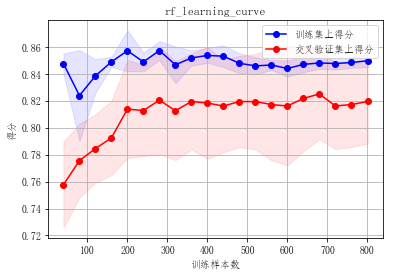

(0.8211565398948384, 0.06603795801402412)

In [84]:
# 绘制随机森林的学习曲线
clf_RF_opt2 = RandomForestClassifier(random_state=0, n_estimators=100,max_depth=8, min_samples_leaf=2,min_samples_split=5,max_features='sqrt',n_jobs=-1)
clf_RF_opt2.fit(X=X,y=y)
plot_learning_curve(estimator=clf_RF_opt2,title="rf_learning_curve",X=X,y=y)

In [85]:
test_df_opt1.loc[(test_df_opt1.title == "Mrs") & (test_df_opt1.Parch > 1),"Mother"] = 1
test_df_opt1.loc[test_df_opt1.Mother.isnull(),"Mother"] = 0
test_df_opt1.Mother.value_counts()

0.0    402
1.0     16
Name: Mother, dtype: int64

In [86]:
test_df = test_df_opt1.filter(regex="Pclass_.*|Sex_.*|title_.*|family_type_.*|Age_type_.*|Fare_bin_.*|Mother")
test_df.columns

Index(['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Fare_bin_(-0.001, 7.796]', 'Fare_bin_(7.796, 11.342]',
       'Fare_bin_(11.342, 21.679]', 'Fare_bin_(21.679, 46.34]',
       'Fare_bin_(46.34, 512.329]', 'title_Master', 'title_Miss', 'title_Mr',
       'title_Mrs', 'title_rare', 'family_type_big', 'family_type_middle',
       'family_type_single', 'Age_type_Adult', 'Age_type_Child',
       'Age_type_Old', 'Age_type_middleAdult', 'Mother'],
      dtype='object')

In [87]:
predictions = clf_RF_opt2.predict(test_df)
result = pd.DataFrame({'PassengerId':data_test['PassengerId'].values, 'Survived':predictions.astype(np.int32)})
result.to_csv("RF_predictions_04.csv", index=False)